<a href="https://colab.research.google.com/github/BandreddyNithin19/Handwriting-Image-Classification/blob/main/Handwriting_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Neccessary Imports
from keras.datasets import mnist
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import SGD, Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.utils import to_categorical
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.utils import shuffle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importing data
data_path='/content/drive/MyDrive/Colab Notebooks/Hand written Data Set.csv'
data = pd.read_csv(data_path).astype('float32')
data

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372445,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372446,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372447,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
372448,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Removing the labels
X = data.drop('0', axis=1)  # Assuming '0' is the column containing labels
Y = data['0']  # Assuming '0' is the column containing labels

In [ ]:
# Splitting Data into Training and Testing
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2)

# Reshape the data
train_X = np.reshape(train_X.values, (train_X.shape[0], 28, 28))
test_X = np.reshape(test_X.values, (test_X.shape[0], 28, 28))

print("Train data shape: ", train_X.shape)
print("Test data shape: ", test_X.shape)


Train data shape:  (297960, 28, 28)
Test data shape:  (74490, 28, 28)


In [ ]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

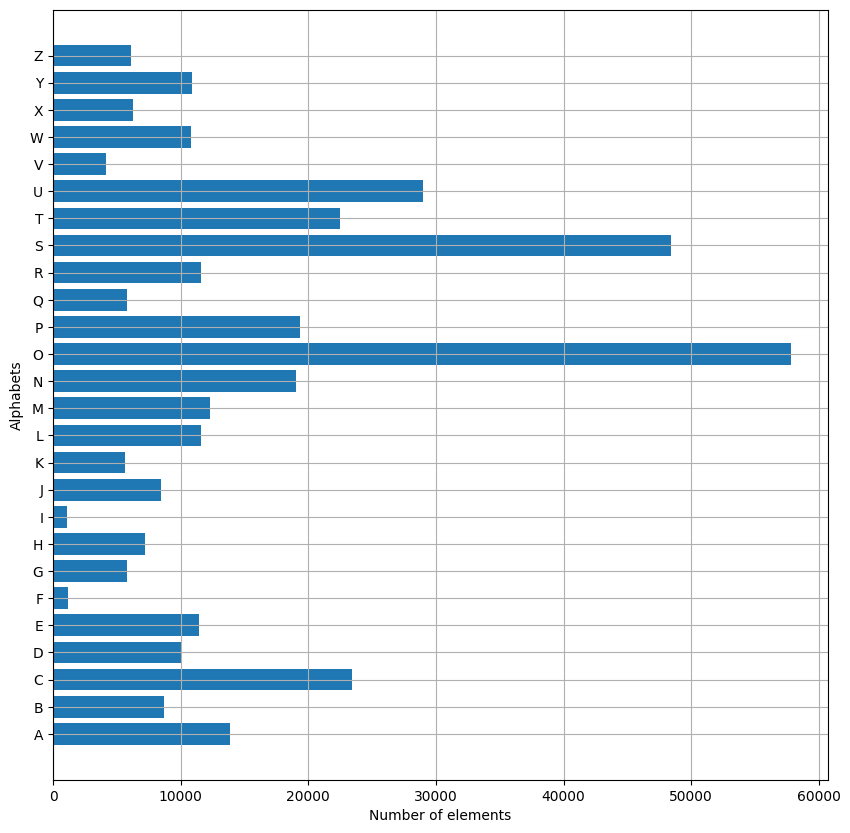

In [ ]:
# Convert labels to integers
train_labels_int = np.int0(y)

# Count the occurrences of each letter
letter_count = np.zeros(26, dtype='int')
for label_int in train_labels_int:
    letter_count[label_int] += 1

# Get alphabet letters
alphabet_letters = list(word_dict.values())

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.barh(alphabet_letters, letter_count)
plt.xlabel("Number of elements")
plt.ylabel("Alphabets")
plt.grid()
plt.show()


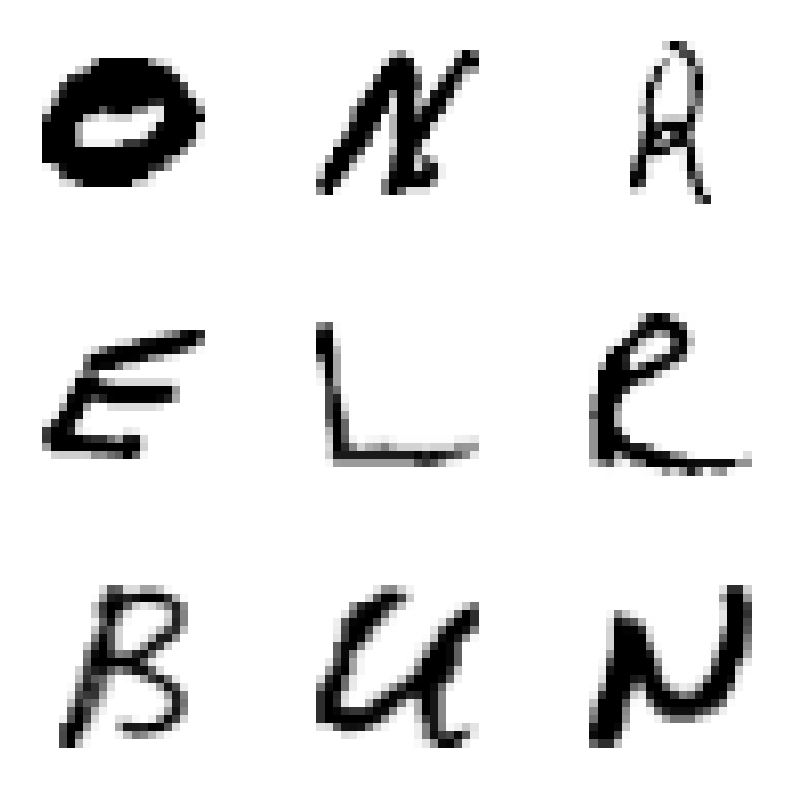

In [ ]:
# Shuffling the dataset
shuffled_subset = shuffle(train_X[:100])  # Assuming train_X is your feature dataset

# Plotting the dataset in 3x3 subplots
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
axes = ax.flatten()

for i in range(9):
    axes[i].imshow(np.reshape(shuffled_subset[i], (28, 28)), cmap="Greys")
    axes[i].axis('off')  # Turn off axis labels for cleaner plots

plt.show()

In [ ]:
# Reshaping the training dataset
train_X = train_X.reshape(train_X.shape[0], train_X.shape[1], train_X.shape[2], 1)
print("New shape of train data: ", train_X.shape)

# Reshaping the test dataset
test_X = test_X.reshape(test_X.shape[0], test_X.shape[1], test_X.shape[2], 1)
print("New shape of test data: ", test_X.shape)

# One-hot encoding the training labels
train_y_OHE = to_categorical(train_y, num_classes=26, dtype='int')
print("New shape of train labels: ", train_y_OHE.shape)

# One-hot encoding the test labels
test_y_OHE = to_categorical(test_y, num_classes=26, dtype='int')
print("New shape of test labels: ", test_y_OHE.shape)

New shape of train data:  (297960, 28, 28, 1)
New shape of test data:  (74490, 28, 28, 1)
New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Creating the model
model = Sequential()

# Convolutional layers with Batch Normalization and Dropout
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.25))

# Flatten layer
model.add(Flatten())

# Dense layers with Batch Normalization and Dropout
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Output layer with softmax activation for multiclass classification
model.add(Dense(26, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

# Compile the model with a specified learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Learning rate reduction callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)

# Early stopping callback
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

In [ ]:
# Display the model summary
model.summary()

# Save the model to a file
model.save('model_hand.h5')

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 batch_normalization_5 (Bat  (None, 26, 26, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_6 (Bat  (None, 13, 13, 64)       

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
history = model.fit(train_X, train_y_OHE, epochs=2, callbacks=[reduce_lr, early_stop],  validation_data = (test_X,test_y_OHE))

Epoch 1/2
9312/9312 [==============================] - 704s 75ms/step - loss: 0.4257 - accuracy: 0.8786 - val_loss: 0.0714 - val_accuracy: 0.9807 - lr: 0.0010
Epoch 2/2
9312/9312 [==============================] - 689s 74ms/step - loss: 0.1744 - accuracy: 0.9525 - val_loss: 0.0577 - val_accuracy: 0.9854 - lr: 0.0010


In [ ]:
# Get the training and validation accuracies and losses
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

print("The validation accuracy is:", val_accuracy)
print("The training accuracy is:", train_accuracy)
print("The validation loss is:", val_loss)
print("The training loss is:", train_loss)

The validation accuracy is: [0.9807356595993042, 0.9853671789169312]
The training accuracy is: [0.8786011338233948, 0.9525070190429688]
The validation loss is: [0.07135823369026184, 0.05766256898641586]
The training loss is: [0.42569440603256226, 0.17439208924770355]


In [ ]:
# Make predictions on the first 9 samples from the test set
predictions = model.predict(test_X[:9])

# Print the shape of the test set
print("Shape of test set:", test_X.shape)

1/1 [==============================] - 0s 151ms/step
Shape of test set: (74490, 28, 28, 1)


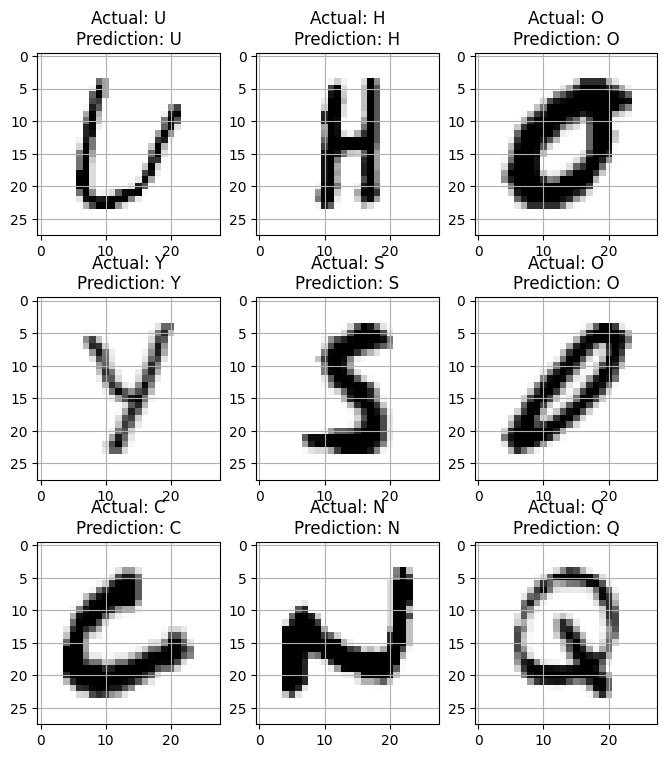

In [ ]:
# Doing some predictions and displaying results
fig, axes = plt.subplots(3, 3, figsize=(8, 9))
axes = axes.flatten()

for i, ax in enumerate(axes):
    # Display the image
    img = np.reshape(test_X[i], (28, 28))
    ax.imshow(img, cmap="Greys")

    # Make a prediction
    pred_label = word_dict[np.argmax(test_y_OHE[i])]

    # Display the actual and predicted labels
    actual_label = word_dict[np.argmax(test_y_OHE[i])]
    ax.set_title(f"Actual: {actual_label}\nPrediction: {pred_label}")

    ax.grid()

plt.show()

In [ ]:
#Doing Prediction on External Image
# Load the image
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DL.jpg')
img_copy = img.copy()

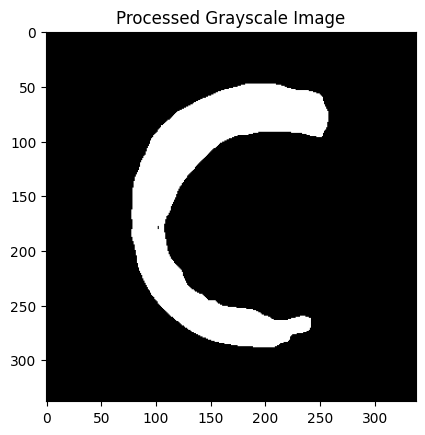

In [ ]:
# Convert the image to RGB format
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Resize the image to a specific size
img = cv2.resize(img, (400, 440))

# Apply Gaussian Blur to the image copy
img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)

# Convert the image copy to grayscale
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)

# Apply thresholding to create a binary image
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

# Display the processed grayscale image for debugging
plt.imshow(img_thresh, cmap="gray")
plt.title("Processed Grayscale Image")
plt.show()

# Resize the binary image to 28x28
img_final = cv2.resize(img_thresh, (28, 28))

# Reshape the binary image to match the input shape of your model
img_final = np.reshape(img_final, (1, 28, 28, 1))

In [ ]:
# Make predictions using the preprocessed image
prediction = model.predict(img_final)

# Get the predicted label based on the highest probability
predicted_label = word_dict[np.argmax(prediction)]
print(predicted_label)

1/1 [==============================] - 0s 24ms/step
C


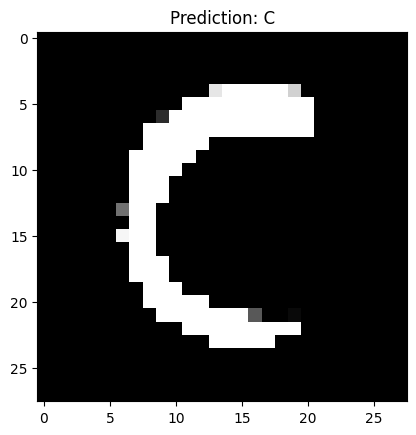

In [ ]:
# Display the preprocessed image and the prediction
plt.imshow(img_final[0, :, :, 0], cmap="gray")
plt.title(f"Prediction: {predicted_label}")
plt.show()